**Group 1**

Final Term Assignment

>
COMPUTER VISION AND PATTERN RECOGNITION

> Name:Pritom Chandra Dey
*   Section:B
*   Id=21-44407-1


In [1]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from keras import regularizers
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from sklearn.model_selection import train_test_split
from shutil import copyfile
import os
train_dir='/content/drive/MyDrive/New folder/train'
test_dir='/content/drive/MyDrive/New folder/Test'
val_dir='/content/drive/MyDrive/New folder/val'


In [5]:
batch_size = 32
target_size = (180, 180)

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=(0.8, 1.2),
    zoom_range=0.2
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1589 images belonging to 3 classes.
Found 4184 images belonging to 3 classes.
Found 1256 images belonging to 3 classes.


In [7]:
def view_images(target_dir, target_class, num_images, rows, cols, target_size):
    target_folder = os.path.join(target_dir, target_class)
    all_images = os.listdir(target_folder)
    random_images = random.sample(all_images, num_images)

    plt.figure(figsize=(18, 10))

    for i, image_name in enumerate(random_images, start=1):
        img_path = os.path.join(target_folder, image_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (target_size, target_size))

        plt.subplot(rows, cols, i)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(target_class)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

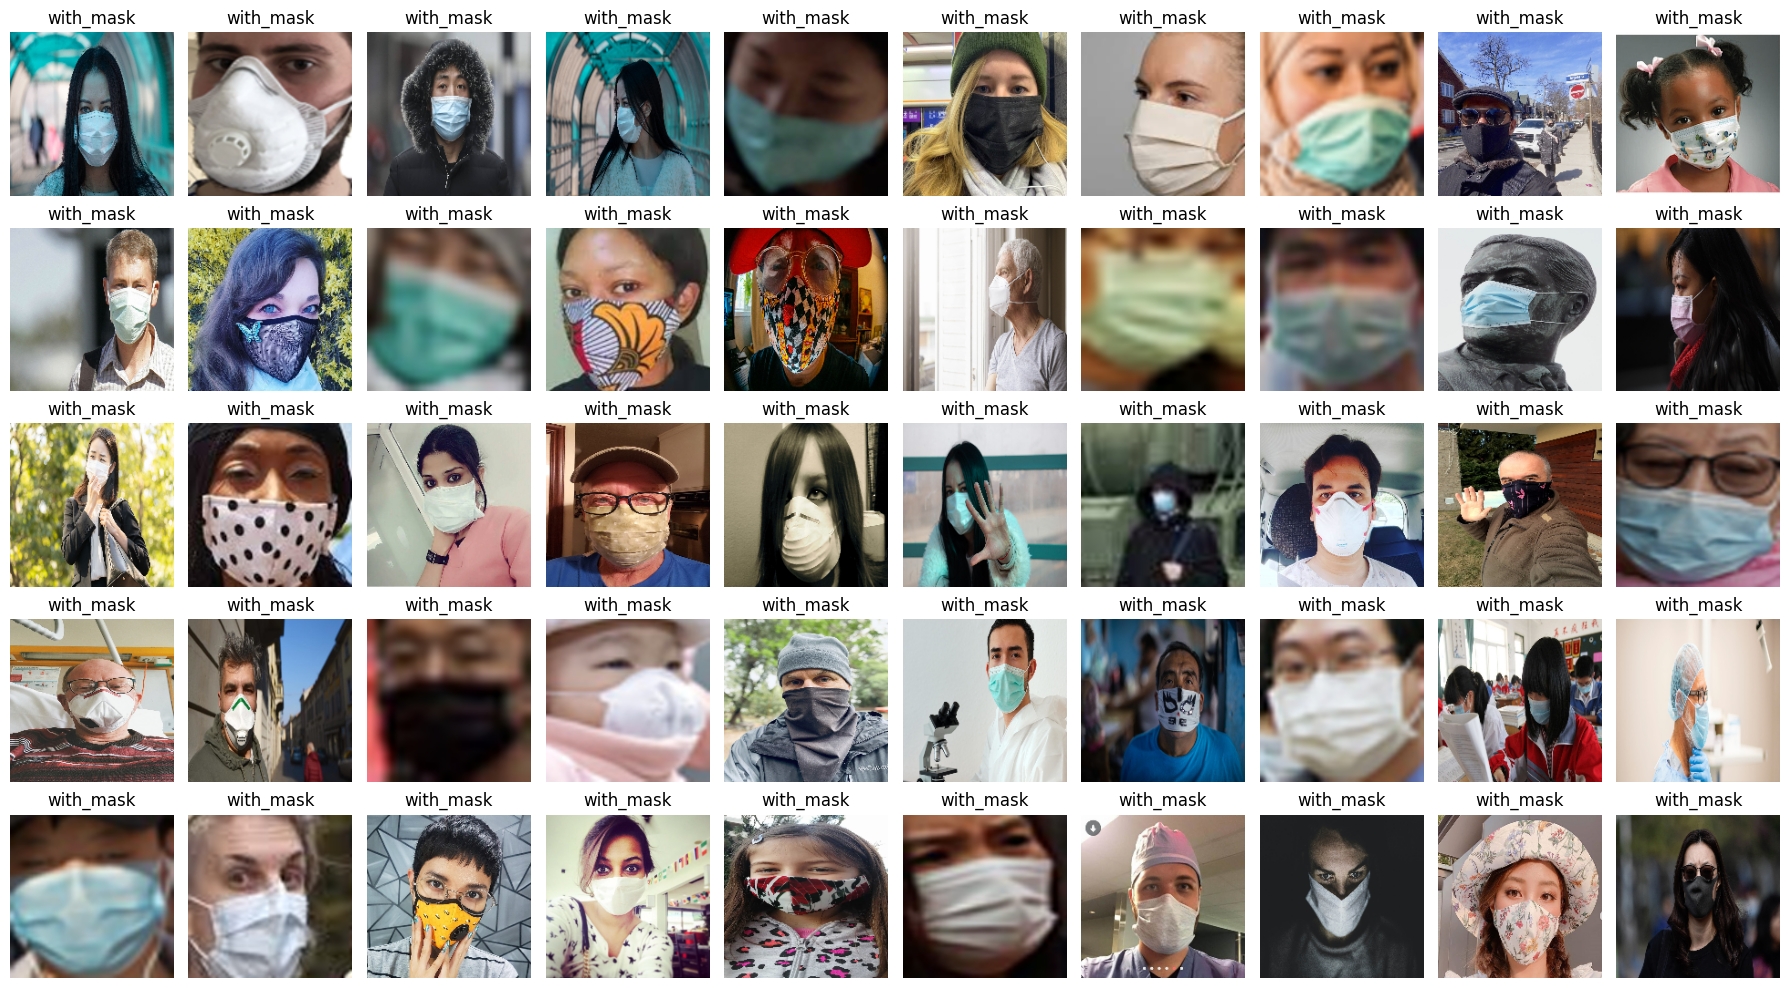

In [8]:
view_images(train_dir, "with_mask", num_images=50, rows=5, cols=10, target_size=180)

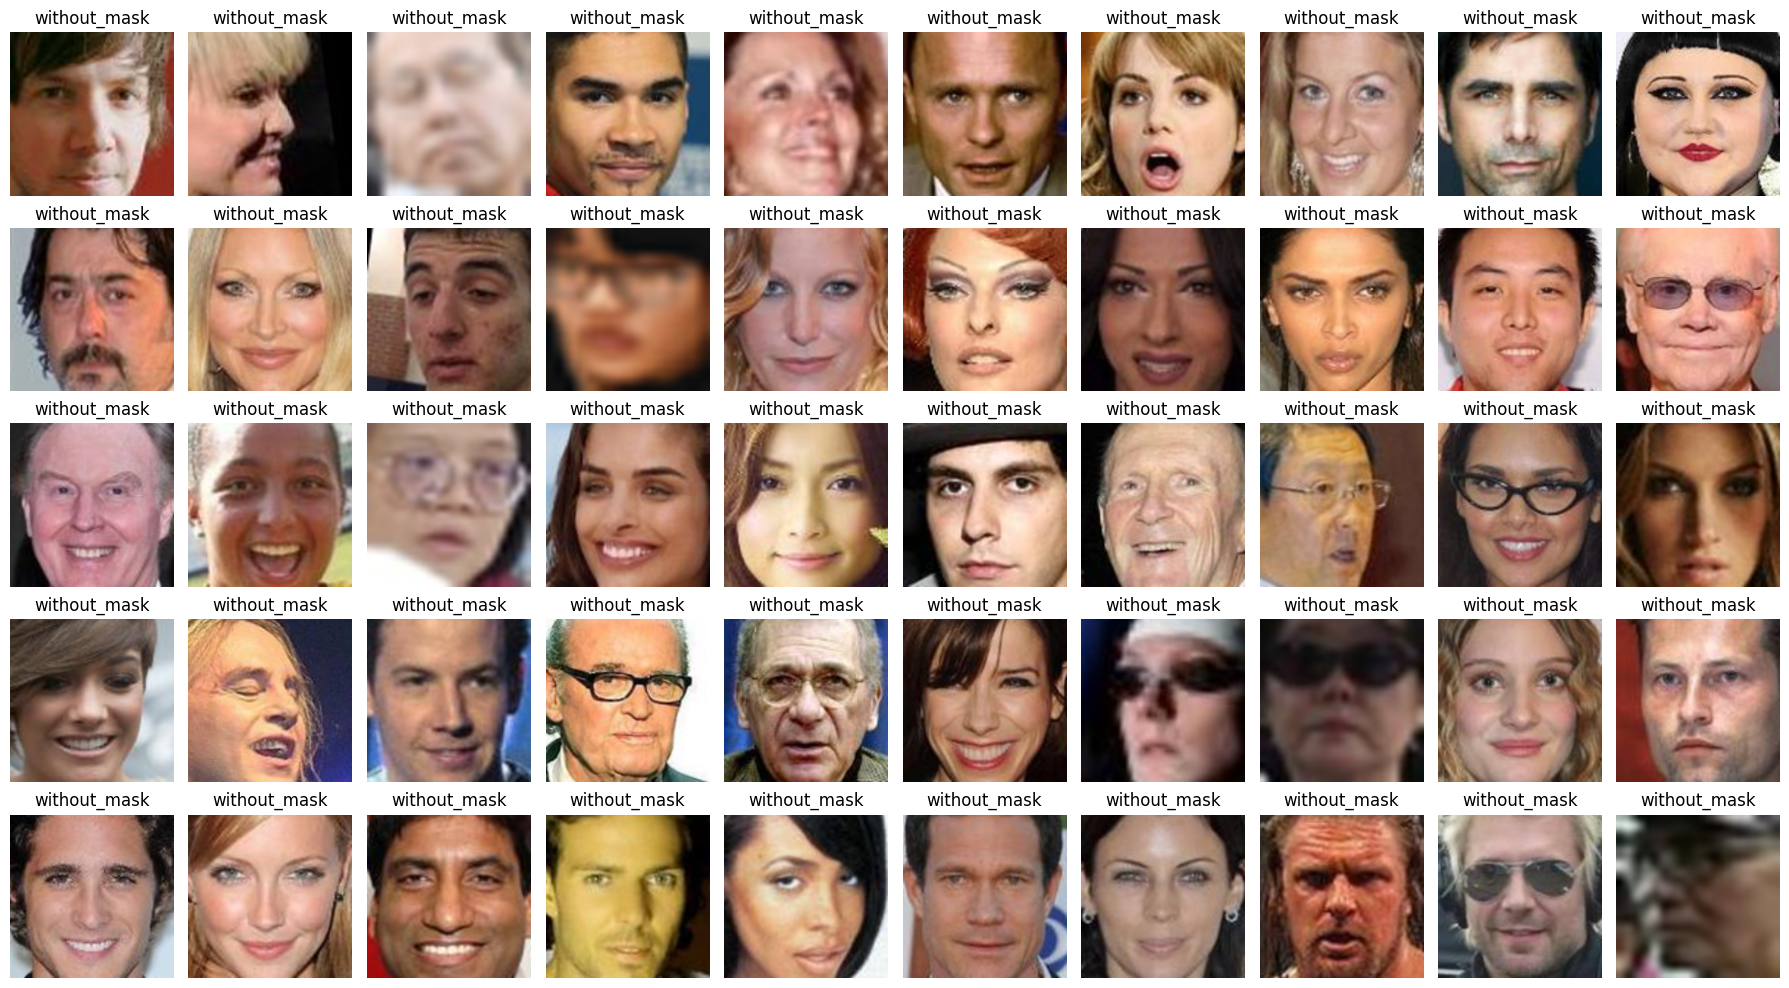

In [9]:
view_images(train_dir, "without_mask", num_images=50, rows=5, cols=10, target_size=180)

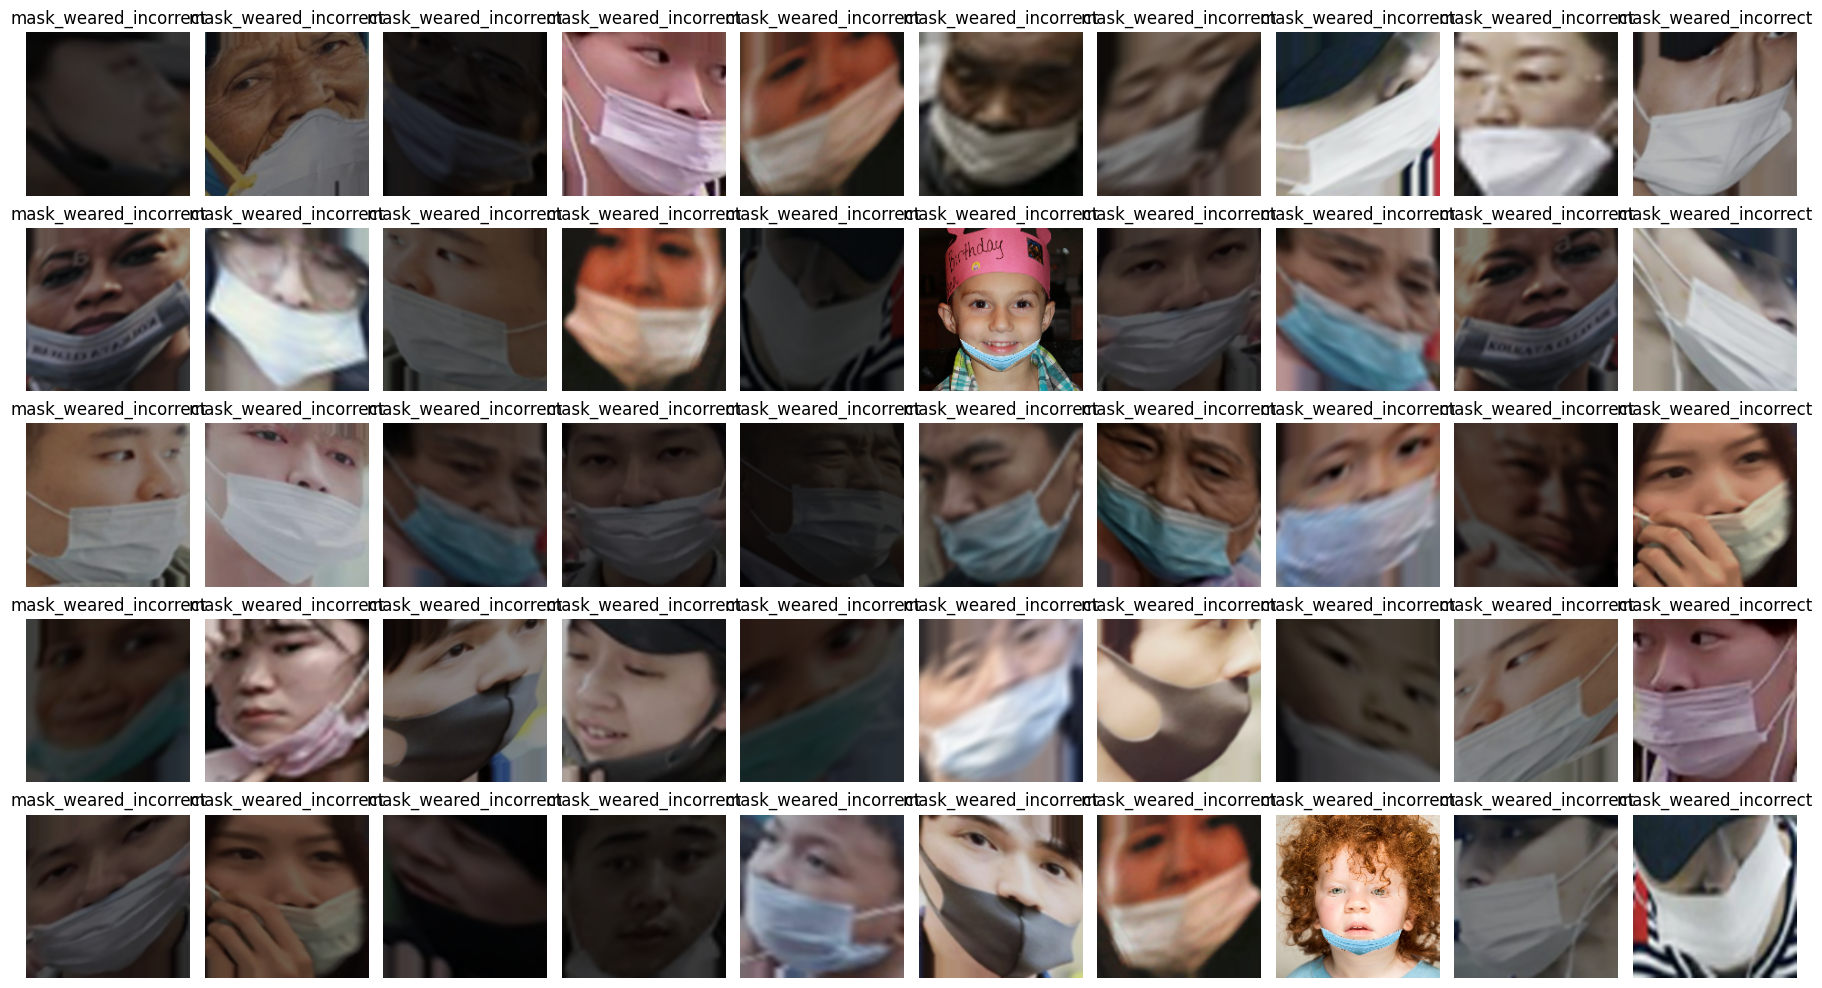

In [10]:
view_images(train_dir, "mask_weared_incorrect", num_images=50, rows=5, cols=10, target_size=180)

In [11]:
import os
import cv2
import random
import numpy as np

train_data = []
train_labels = []

with_mask_dir = os.path.join(train_dir, "with_mask")
without_mask_dir = os.path.join(train_dir, "without_mask")
improper_mask_dir = os.path.join(train_dir, "mask_weared_incorrect")

def load_and_resize_image(image_path, target_size=(128, 128)):
    try:
        image = cv2.imread(image_path)
        if image is not None:
            image = cv2.resize(image, target_size)
            return image
        else:
            print(f"Unable to load image: {image_path}")
            return None
    except Exception as e:
        print(f"Error loading or resizing image: {e}")
        return None

for a in os.listdir(improper_mask_dir):
    image = load_and_resize_image(os.path.join(improper_mask_dir, a))
    if image is not None:
        train_data.append(image)
        train_labels.append(2)

for a in os.listdir(with_mask_dir):
    image = load_and_resize_image(os.path.join(with_mask_dir, a))
    if image is not None:
        train_data.append(image)
        train_labels.append(1)

for a in os.listdir(without_mask_dir):
    image = load_and_resize_image(os.path.join(without_mask_dir, a))
    if image is not None:
        train_data.append(image)
        train_labels.append(0)


Unable to load image: /content/drive/MyDrive/New folder/train/mask_weared_incorrect/1424.png


In [12]:
train_data = np.array(train_data) / 255.0
train_labels = np.array(train_labels)

print(f"Train Data Shape\t: {train_data.shape}")
print(f"Train Label Shape\t: {train_labels.shape}")

Train Data Shape	: (1588, 128, 128, 3)
Train Label Shape	: (1588,)


In [13]:
import os
import cv2
import random
import numpy as np

test_data = []
test_labels = []

with_mask_dir = os.path.join(test_dir, "with_mask")
without_mask_dir = os.path.join(test_dir, "without_mask")
improper_mask_dir = os.path.join(test_dir, "mask_weared_incorrect")

def load_and_resize_image(image_path, target_size=(128, 128)):
    try:
        image = cv2.imread(image_path)
        if image is not None:
            image = cv2.resize(image, target_size)
            return image
        else:
            print(f"Unable to load image: {image_path}")
            return None
    except Exception as e:
        print(f"Error loading or resizing image: {e}")
        return None

for a in os.listdir(improper_mask_dir):
    image = load_and_resize_image(os.path.join(improper_mask_dir, a))
    if image is not None:
        test_data.append(image)
        test_labels.append(2)

for a in os.listdir(with_mask_dir):
    image = load_and_resize_image(os.path.join(with_mask_dir, a))
    if image is not None:
        test_data.append(image)
        test_labels.append(1)

for a in os.listdir(without_mask_dir):
    image = load_and_resize_image(os.path.join(without_mask_dir, a))
    if image is not None:
        test_data.append(image)
        test_labels.append(0)


In [14]:
test_data = np.array(test_data) / 255.0
test_labels = np.array(test_labels)

print(f"Test Data Shape \t: {test_data.shape}")
print(f"Test Label Shape\t: {test_labels.shape}")

Test Data Shape 	: (4184, 128, 128, 3)
Test Label Shape	: (4184,)


In [15]:
import os
import cv2
import random
import numpy as np

val_data = []
val_labels = []

with_mask_dir = os.path.join(val_dir, "with_mask")
without_mask_dir = os.path.join(val_dir, "without_mask")
improper_mask_dir = os.path.join(val_dir, "mask_weared_incorrect")

def load_and_resize_image(image_path, target_size=(128, 128)):
    try:
        image = cv2.imread(image_path)
        if image is not None:
            image = cv2.resize(image, target_size)
            return image
        else:
            print(f"Unable to load image: {image_path}")
            return None
    except Exception as e:
        print(f"Error loading or resizing image: {e}")
        return None

for a in os.listdir(improper_mask_dir):
    image = load_and_resize_image(os.path.join(improper_mask_dir, a))
    if image is not None:
        val_data.append(image)
        val_labels.append(2)

for a in os.listdir(with_mask_dir):
    image = load_and_resize_image(os.path.join(with_mask_dir, a))
    if image is not None:
        val_data.append(image)
        val_labels.append(1)

for a in os.listdir(without_mask_dir):
    image = load_and_resize_image(os.path.join(without_mask_dir, a))
    if image is not None:
        val_data.append(image)
        val_labels.append(0)


In [16]:
val_data = np.array(val_data) / 255.0
val_labels = np.array(val_labels)

print(f"Validation Data Shape \t: {val_data.shape}")
print(f"Validation Label Shape\t: {val_labels.shape}")

Validation Data Shape 	: (1256, 128, 128, 3)
Validation Label Shape	: (1256,)


In [17]:
X_train, y_train = (train_data, train_labels)
X_test, y_test = (test_data, test_labels)
X_val, y_val = (val_data, val_labels)

In [24]:
num_classes = 3  # Number of classes: WithMask, WithoutMask, ImproperMask

# Load MobileNet model with pre-trained weights
base_model = tf.keras.applications.MobileNet(
    input_shape = [128,128,3],
    weights = "imagenet",
    include_top = False
)

# Freeze the base model's layers
base_model.trainable = False

# Create your custom classification head
x = Flatten()(base_model.output)
x = Dense(units=256, activation="relu")(x)
x = Dense(units=64, activation="relu")(x)
# Use softmax for multi-class classification
prediction_layer = Dense(units=num_classes, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=prediction_layer)

17225924/17225924 [==============================] - 0s 0us/step


In [25]:
adam_lr = 0.00001
beta1 = 0.99
beta2 = 0.99
eps = 1e-9

optimizer_adam = keras.optimizers.Adam(learning_rate=adam_lr, beta_1=beta1, beta_2=beta2, epsilon=eps)

model.compile(
    optimizer = optimizer_adam,
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [26]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 64, 64, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 64, 64, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 64, 64, 32)        128 

In [22]:
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

In [27]:
h_mobileNet = model.fit(
    X_train, y_train,
    epochs = 10,
    validation_data = (X_val, y_val),
    batch_size = 32
)

Epoch 1/10
50/50 [==============================] - 9s 83ms/step - loss: 0.6797 - accuracy: 0.7343 - val_loss: 0.2283 - val_accuracy: 0.8997
Epoch 2/10
50/50 [==============================] - 1s 25ms/step - loss: 0.1894 - accuracy: 0.9332 - val_loss: 0.1053 - val_accuracy: 0.9634
Epoch 3/10
50/50 [==============================] - 1s 28ms/step - loss: 0.1168 - accuracy: 0.9591 - val_loss: 0.0775 - val_accuracy: 0.9761
Epoch 4/10
50/50 [==============================] - 1s 25ms/step - loss: 0.0647 - accuracy: 0.9761 - val_loss: 0.0625 - val_accuracy: 0.9817
Epoch 5/10
50/50 [==============================] - 1s 24ms/step - loss: 0.0403 - accuracy: 0.9880 - val_loss: 0.0478 - val_accuracy: 0.9881
Epoch 6/10
50/50 [==============================] - 1s 28ms/step - loss: 0.0260 - accuracy: 0.9943 - val_loss: 0.0424 - val_accuracy: 0.9904
Epoch 7/10
50/50 [==============================] - 1s 24ms/step - loss: 0.0172 - accuracy: 0.9969 - val_loss: 0.0423 - val_accuracy: 0.9896
Epoch 8/10
50

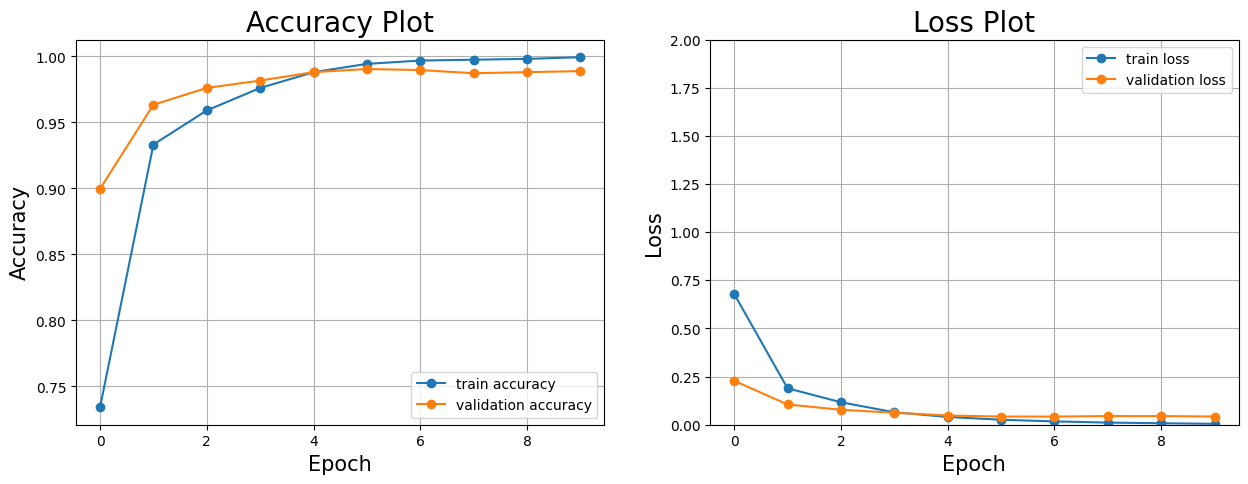

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Accuracy Plot", size=20)
plt.plot(h_mobileNet.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h_mobileNet.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch', size=15)
plt.ylabel('Accuracy', size=15)
plt.grid(True)
plt.legend(loc='lower right')


plt.subplot(1,2,2)
plt.title("Loss Plot", size=20)
plt.plot(h_mobileNet.history['loss'], 'o-', label='train loss')
plt.plot(h_mobileNet.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch', size=15)
plt.ylabel('Loss', size=15)
plt.ylim([0, 2])
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [29]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tabulate import tabulate

predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

accuracy = accuracy_score(y_test, predicted_classes)
print(f"Accuracy: {accuracy:.2f}")

confusion = confusion_matrix(y_test, predicted_classes)

confusion_df = pd.DataFrame(
    confusion, index = ["without_mask", "with_mask", "mask_weared_incorrect"],
    columns = ["without_mask", "with_mask", "mask_weared_incorrect"]
)

tabulated_confusion = tabulate(confusion_df, headers='keys', tablefmt='pretty')

print("Confusion Matrix:")
print(tabulated_confusion)

class_names = ["with_mask", "without_mask", "mask_weared_incorrect"]
report = classification_report(y_test, predicted_classes, target_names=class_names)

# Display classification report
print("\nClassification Report:")
print(report)

131/131 [==============================] - 2s 15ms/step
Accuracy: 0.99
Confusion Matrix:
+-----------------------+--------------+-----------+-----------------------+
|                       | without_mask | with_mask | mask_weared_incorrect |
+-----------------------+--------------+-----------+-----------------------+
|     without_mask      |     1500     |     2     |          14           |
|       with_mask       |      2       |    293    |          28           |
| mask_weared_incorrect |      0       |     2     |         2343          |
+-----------------------+--------------+-----------+-----------------------+

Classification Report:
                       precision    recall  f1-score   support

            with_mask       1.00      0.99      0.99      1516
         without_mask       0.99      0.91      0.95       323
mask_weared_incorrect       0.98      1.00      0.99      2345

             accuracy                           0.99      4184
            macro avg       0.9

**Description**:

> Training Summary:


*   The training process involved 131 steps, each taking approximately 15 milliseconds.
*   The model achieved an accuracy of 99%, indicating a high level of performance on the test dataset





> Confusion Matrix:

*   The confusion matrix provides a detailed breakdown of the model's predictions versus the actual labels for each class
*   Rows represent actual classes, while columns represent predicted classes.

*   For instance, in the "without_mask" row, the model predicted 1500 instances correctly, 2 instances were misclassified as "with_mask," and 14 instances were misclassified as "mask_weared_incorrect."


> Classification Report:

*   The classification report provides precision, recall, and F1-score for each class, along with overall accuracy and other metrics.
- Precision is the ratio of true positive predictions to the total predicted positives. Recall is the ratio of true positive predictions to the total actual positives.
- F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.
- The "support" column indicates the number of instances of each class in the test dataset.



> Analysis:

*  The model exhibits excellent performance with an overall accuracy of 99%, indicating robust face mask detection.
- The confusion matrix and classification report provide insights into the model's strengths and weaknesses for each class.
- The high precision and recall values for each class suggest a well-balanced model with few misclassifications.
- The weighted average F1-score of 99% further supports the model's effectiveness across different classes.



> In conclusion, the model appears to be highly accurate and reliable for face mask detection, as evidenced by the comprehensive evaluation metrics presented in the output. The analysis provides a detailed understanding of the model's performance, enabling potential fine-tuning or deployment in real-world scenarios.























